In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

df = pd.read_csv("heart.csv")
df = df.dropna()

heart_disease = df['HeartDisease']
heart_disease_dataset = df 
df = df.drop(columns = 'HeartDisease')

In [2]:
def set_up_bar_chart(title_string, subtitle_string): 
    fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

    # Plot bars
    # Remove the spines
    ax.spines[['top','left','bottom']].set_visible(False)

    # Make the left spine thicker
    ax.spines['right'].set_linewidth(1.1)

    # Add in red line and rectangle on top
    ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
    ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

    # Add in title and subtitle
    ax.text(x=0.12, y=.93, s=title_string, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
    ax.text(x=0.12, y=.90, s=subtitle_string, transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

    # Set source text
    ax.text(x=0.1, y=0.12, s="Source: Kaggle - Heart Failure Prediction - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

    # Adjust the margins around the plot area
    plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

    # Set a white background
    fig.patch.set_facecolor('white')

In [3]:
def creating_female_and_male_dictionaries(column_name): 
    column_list = list(df[column_name])
    del column_list[0]
    male = {} 
    female = {} 
    for i in range(0, len(column_list)):
        if gender_column[i] == 'M':
            if column_list[i] not in male.keys():
                male[column_list[i]] = 1 
            else:
                male[column_list[i]] += 1
        elif gender_column[i] == 'F':
            if column_list[i] not in female.keys():
                female[column_list[i]] = 1 
            else: 
                female[column_list[i]] += 1
    
    maleKeys = list(male.keys())
    maleKeys.sort()
    male_dict = {i: male[i] for i in maleKeys}

    femaleKeys = list(female.keys())
    femaleKeys.sort()
    female_dict = {i: female[i] for i in femaleKeys}
 
    return male_dict, female_dict 

In [4]:
def creating_female_and_male_dictionaries_heart_disease(column_name): 
    column_list = list(heart_disease_dataset[column_name])
    del column_list[0]
    male = {} 
    female = {} 
    for i in range(0, len(column_list)):
        if gender_column[i] == 'M':
            if column_list[i] not in male.keys():
                male[column_list[i]] = 1 
            else:
                male[column_list[i]] += 1
        elif gender_column[i] == 'F':
            if column_list[i] not in female.keys():
                female[column_list[i]] = 1 
            else: 
                female[column_list[i]] += 1
    
    maleKeys = list(male.keys())
    maleKeys.sort()
    male_dict = {i: male[i] for i in maleKeys}

    femaleKeys = list(female.keys())
    femaleKeys.sort()
    female_dict = {i: female[i] for i in femaleKeys}
 
    return male_dict, female_dict 

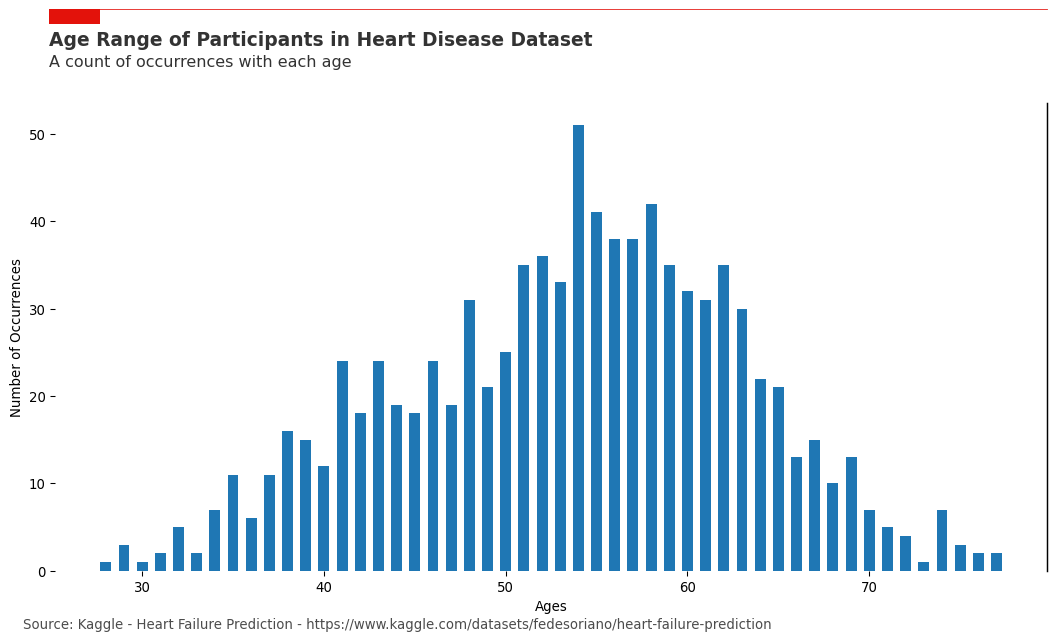

In [5]:
'''
Ages 
Creates a bar distribution of all the ages, and then the 
ages seperated by male and female 
'''
# All ages 
ages = {} 
age_column = list(df['Age'])
gender_column = list(df['Sex'])
del age_column[0], gender_column[0]
for age in age_column: 
    if age not in ages.keys():
        ages[age] = 1
    else:
        ages[age] += 1

set_up_bar_chart("Age Range of Participants in Heart Disease Dataset", "A count of occurrences with each age")
bar1 = plt.bar(ages.keys(), ages.values(), width=0.6)
plt.xlabel('Ages')
plt.ylabel('Number of Occurrences')
plt.show()        

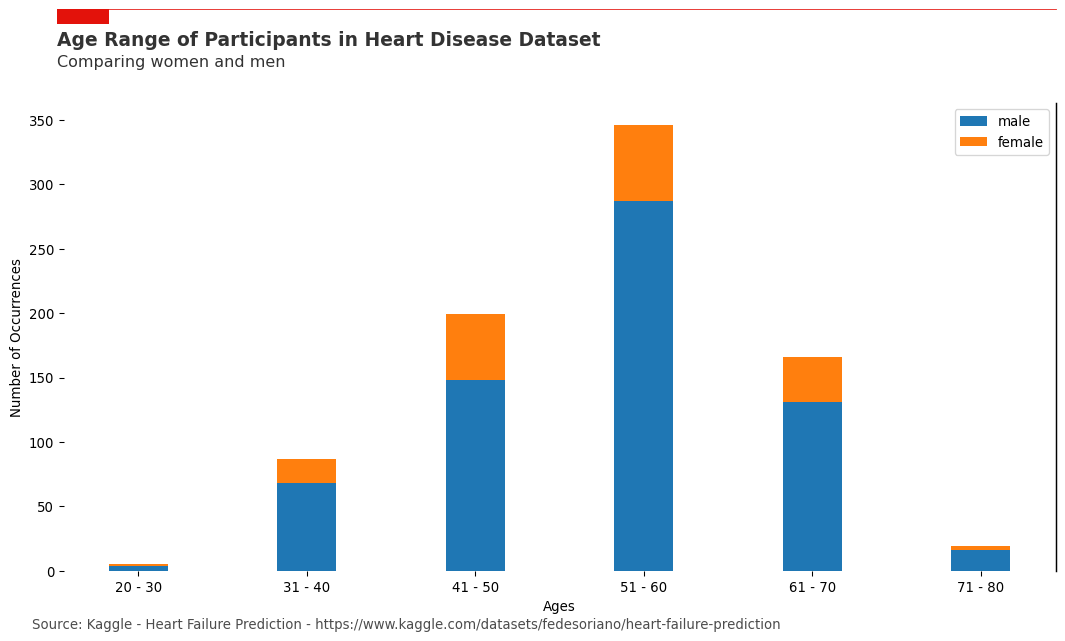

In [6]:
# Male and Female Age Distributions 
male_age_occurrences = {'20 - 30': 0, '31 - 40': 0, '41 - 50': 0, '51 - 60': 0, '61 - 70': 0, '71 - 80': 0} 
female_age_occurrences = {'20 - 30': 0, '31 - 40': 0, '41 - 50': 0, '51 - 60': 0, '61 - 70': 0, '71 - 80': 0}  

for i in range(0, len(gender_column)):
    age = int(age_column[i])
    if gender_column[i] == 'F':
        if age <= 30: 
            female_age_occurrences['20 - 30'] += 1 
        elif 30 < age <= 40: 
            female_age_occurrences['31 - 40'] += 1 
        elif 41 < age <= 50: 
            female_age_occurrences['41 - 50'] += 1 
        elif 51 < age <= 60: 
            female_age_occurrences['51 - 60'] += 1
        elif 61 < age <= 70: 
            female_age_occurrences['61 - 70'] += 1
        elif 71 < age <= 80: 
            female_age_occurrences['71 - 80'] += 1
    if gender_column[i] == 'M':
        if age <= 30: 
            male_age_occurrences['20 - 30'] += 1 
        elif 30 < age <= 40: 
            male_age_occurrences['31 - 40'] += 1 
        elif 41 < age <= 50: 
            male_age_occurrences['41 - 50'] += 1 
        elif 51 < age <= 60: 
            male_age_occurrences['51 - 60'] += 1
        elif 61 < age <= 70: 
            male_age_occurrences['61 - 70'] += 1
        elif 71 < age <= 80: 
            male_age_occurrences['71 - 80'] += 1

set_up_bar_chart("Age Range of Participants in Heart Disease Dataset", "Comparing women and men")
p1 = plt.bar(list(male_age_occurrences.keys()), list(male_age_occurrences.values()), 0.35)
p2 = plt.bar(list(female_age_occurrences.keys()), list(female_age_occurrences.values()), 0.35,
             bottom = list(male_age_occurrences.values()),)
 
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.xlabel('Ages')
plt.ylabel('Number of Occurrences')
plt.show()

{'Male': 724, 'Female': 193}


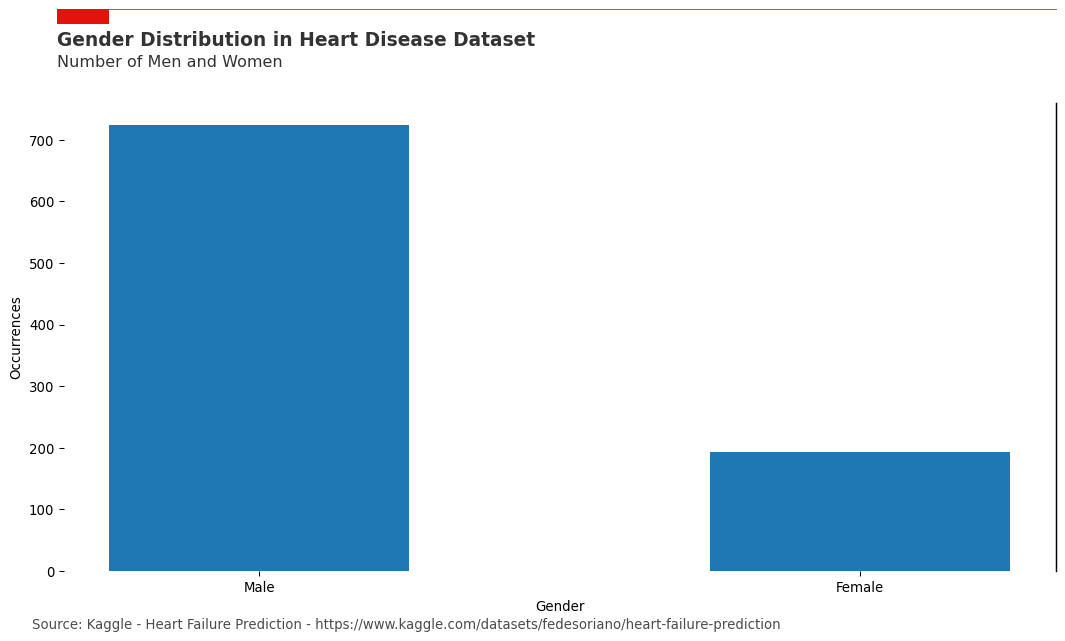

In [7]:
'''
Sex
Overall distribution of men and women in the dataset
'''

gender = {'Male': 0, 'Female': 0} 
for i in range(0, len(gender_column)):
    if gender_column[i] == 'M':
        gender['Male'] += 1
    else: 
        gender['Female'] += 1

print(gender)
        
set_up_bar_chart("Gender Distribution in Heart Disease Dataset", "Number of Men and Women")

plt.bar(list(gender.keys()), list(gender.values()), 0.5)
plt.xlabel('Gender')
plt.ylabel('Occurrences')
plt.show()

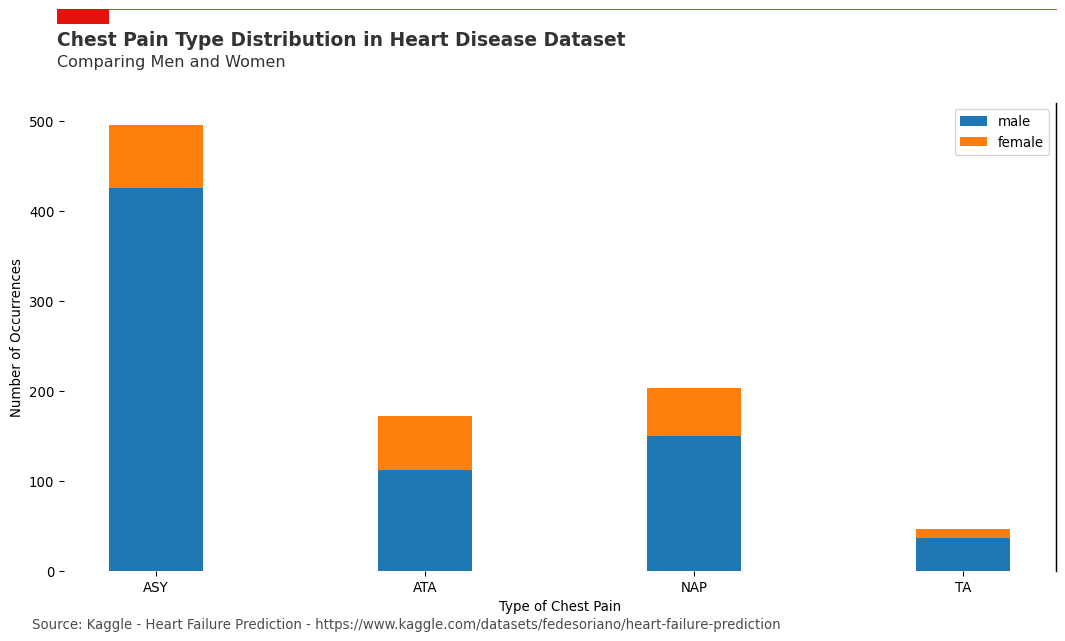

In [8]:
'''
Chest Pain
'''
male_chest_pain, female_chest_pain = creating_female_and_male_dictionaries('ChestPainType')
set_up_bar_chart("Chest Pain Type Distribution in Heart Disease Dataset", "Comparing Men and Women")

p1 = plt.bar(list(male_chest_pain.keys()), list(male_chest_pain.values()), 0.35)
p2 = plt.bar(list(female_chest_pain.keys()), list(female_chest_pain.values()), 0.35,
             bottom = list(male_chest_pain.values()))
 
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.xlabel('Type of Chest Pain')
plt.ylabel('Number of Occurrences')
plt.show()


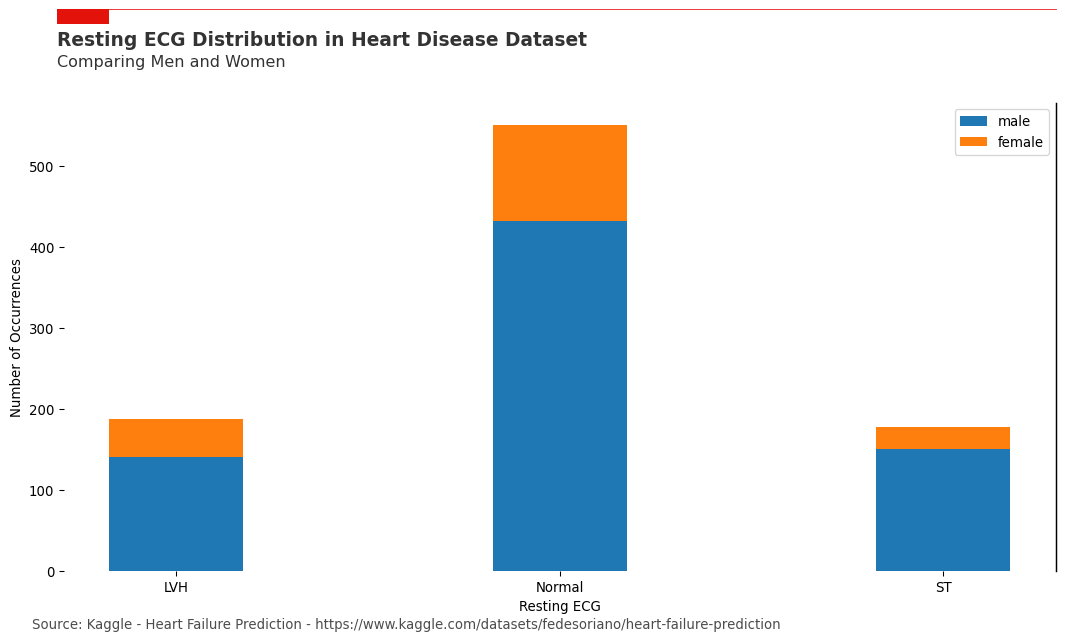

In [9]:
'''
Resting ECG
'''
male_resting_ecg, female_resting_ecg = creating_female_and_male_dictionaries('RestingECG')
set_up_bar_chart("Resting ECG Distribution in Heart Disease Dataset", "Comparing Men and Women")

p1 = plt.bar(list(male_resting_ecg.keys()), list(male_resting_ecg.values()), 0.35)
p2 = plt.bar(list(female_resting_ecg.keys()), list(female_resting_ecg.values()), 0.35,
             bottom = list(male_resting_ecg.values()))
 
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.xlabel('Resting ECG')
plt.ylabel('Number of Occurrences')
plt.show()


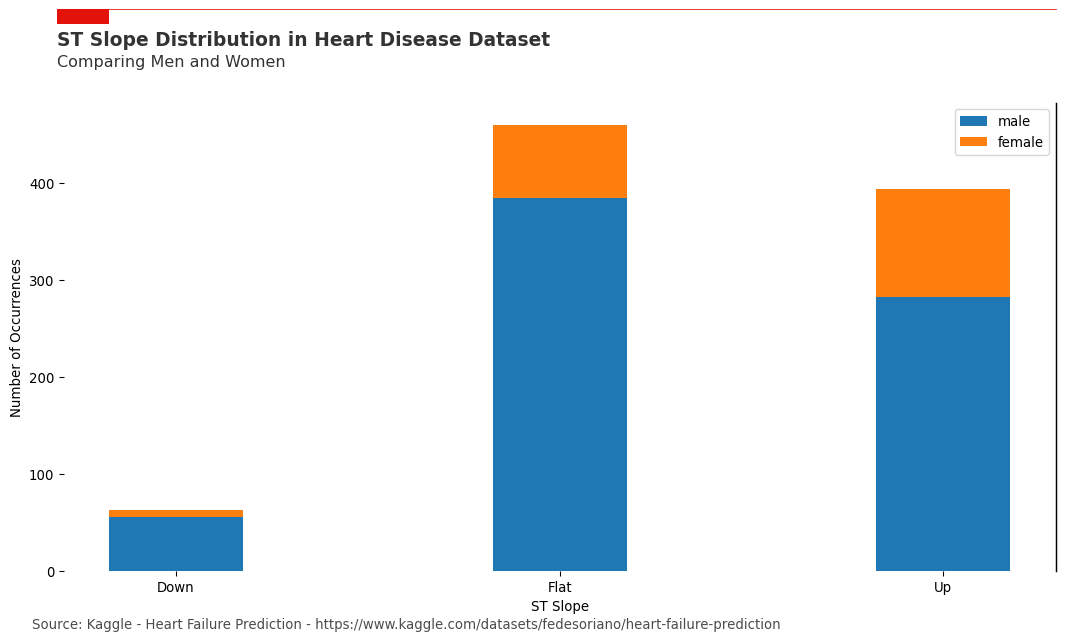

In [10]:
'''
ST Slope
'''
male_ST_Slope, female_ST_Slope = creating_female_and_male_dictionaries('ST_Slope')
set_up_bar_chart("ST Slope Distribution in Heart Disease Dataset", "Comparing Men and Women")

p1 = plt.bar(list(male_ST_Slope.keys()), list(male_ST_Slope.values()), 0.35)
p2 = plt.bar(list(female_ST_Slope.keys()), list(female_ST_Slope.values()), 0.35,
             bottom = list(male_ST_Slope.values()))
 
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.xlabel('ST Slope')
plt.ylabel('Number of Occurrences')
plt.show()

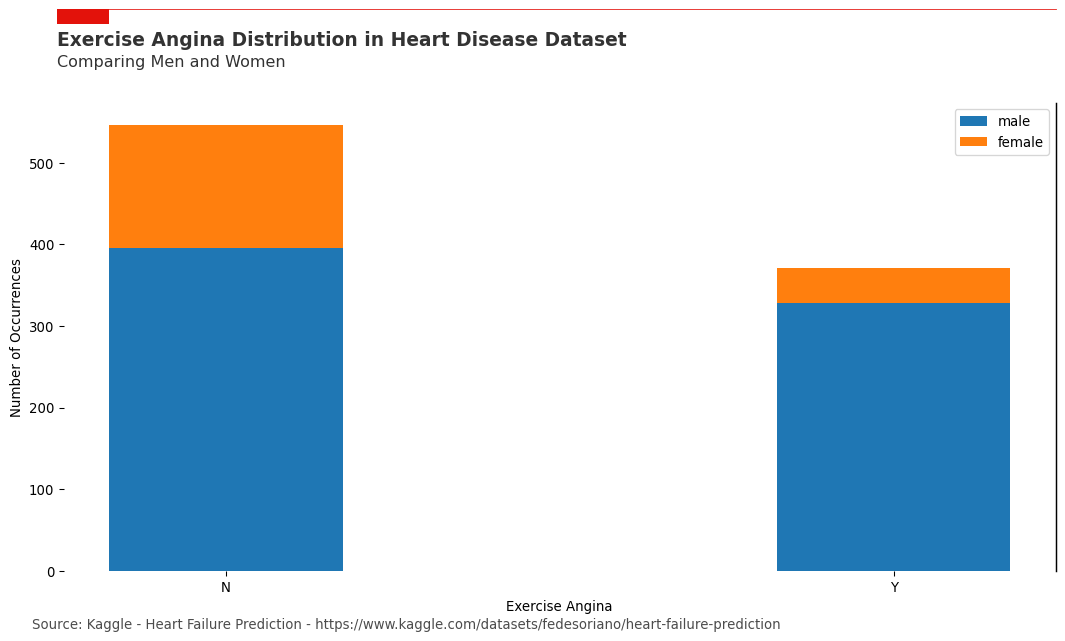

In [11]:
'''
Exercise Angina
'''
male_exercise_angina, female_exercise_angina = creating_female_and_male_dictionaries('ExerciseAngina')
set_up_bar_chart("Exercise Angina Distribution in Heart Disease Dataset", "Comparing Men and Women")

p1 = plt.bar(list(male_exercise_angina.keys()), list(male_exercise_angina.values()), 0.35)
p2 = plt.bar(list(female_exercise_angina.keys()), list(female_exercise_angina.values()), 0.35,
             bottom = list(male_exercise_angina.values()))
 
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.xlabel('Exercise Angina')
plt.ylabel('Number of Occurrences')
plt.show()

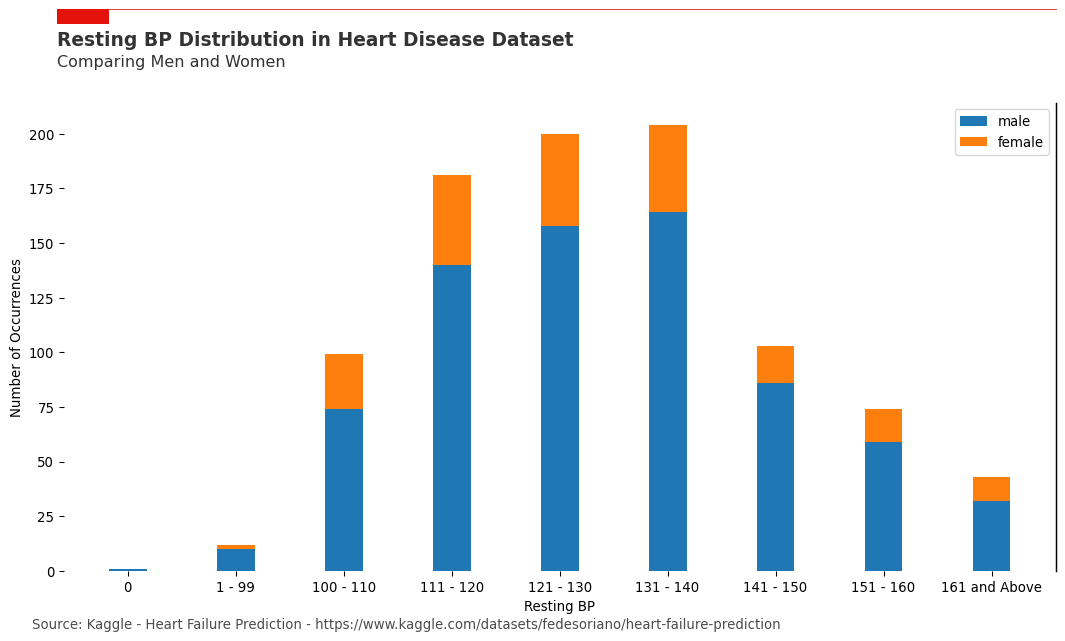

In [12]:
'''
Resting BP 
'''
male_BP_occurrences = {'0': 0, '1 - 99': 0, '100 - 110': 0, '111 - 120': 0, '121 - 130': 0, '131 - 140': 0, '141 - 150': 0, '151 - 160': 0, "161 and Above": 0} 
female_BP_occurrences = {'0': 0, '1 - 99': 0, '100 - 110': 0, '111 - 120': 0, '121 - 130': 0, '131 - 140': 0, '141 - 150': 0, '151 - 160': 0, "161 and Above": 0}  

resting_BP_column = list(df['RestingBP'])
del resting_BP_column[0]

for i in range(0, len(gender_column)):
    bp = int(resting_BP_column[i])
    if gender_column[i] == 'F':
        if bp == 0: 
            female_BP_occurrences['0'] += 1 
        elif 0 < bp <= 99: 
            female_BP_occurrences['1 - 99'] += 1 
        elif 99 < bp <= 110: 
            female_BP_occurrences['100 - 110'] += 1 
        elif 110 < bp <= 120: 
            female_BP_occurrences['111 - 120'] += 1
        elif 120 < bp <= 130: 
            female_BP_occurrences['121 - 130'] += 1
        elif 130 < bp <= 140: 
            female_BP_occurrences['131 - 140'] += 1
        elif 140 < bp <= 150: 
            female_BP_occurrences['141 - 150'] += 1
        elif 151 < bp <= 160: 
            female_BP_occurrences['151 - 160'] += 1
        elif 160 < bp: 
            female_BP_occurrences['161 and Above'] += 1
    if gender_column[i] == 'M':
        if bp == 0: 
            male_BP_occurrences['0'] += 1 
        elif 0 < bp <= 99: 
            male_BP_occurrences['1 - 99'] += 1 
        elif 99 < bp <= 110: 
            male_BP_occurrences['100 - 110'] += 1 
        elif 110 < bp <= 120: 
            male_BP_occurrences['111 - 120'] += 1
        elif 120 < bp <= 130: 
            male_BP_occurrences['121 - 130'] += 1
        elif 130 < bp <= 140: 
            male_BP_occurrences['131 - 140'] += 1
        elif 140 < bp <= 150: 
            male_BP_occurrences['141 - 150'] += 1
        elif 151 < bp <= 160: 
            male_BP_occurrences['151 - 160'] += 1
        elif 160 < bp: 
            male_BP_occurrences['161 and Above'] += 1

set_up_bar_chart("Resting BP Distribution in Heart Disease Dataset", "Comparing Men and Women")

p1 = plt.bar(list(male_BP_occurrences.keys()), list(male_BP_occurrences.values()), 0.35)
p2 = plt.bar(list(female_BP_occurrences.keys()), list(female_BP_occurrences.values()), 0.35,
             bottom = list(male_BP_occurrences.values()))
 
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.xlabel('Resting BP')
plt.ylabel('Number of Occurrences')
plt.show()


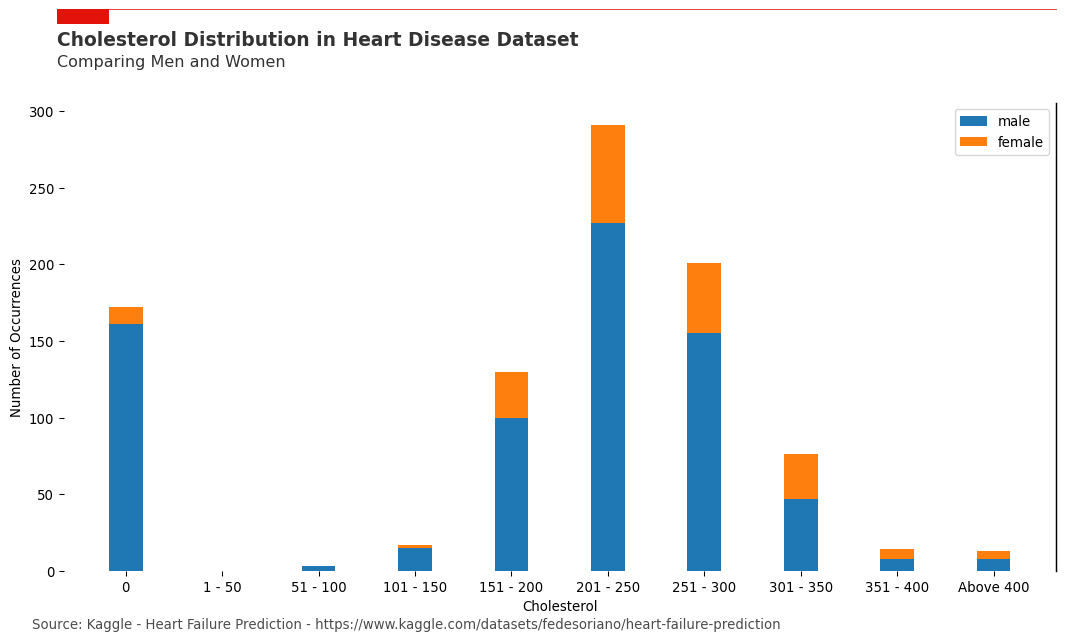

In [13]:
'''
Cholesterol
'''
female_chol = {'0': 0, '1 - 50': 0, '51 - 100': 0, '101 - 150': 0, '151 - 200': 0, '201 - 250': 0, '251 - 300': 0, '301 - 350': 0, '351 - 400': 0, 'Above 400': 0} 
male_chol = {'0': 0, '1 - 50': 0, '51 - 100': 0, '101 - 150': 0, '151 - 200': 0, '201 - 250': 0, '251 - 300': 0, '301 - 350': 0, '351 - 400': 0, 'Above 400': 0} 

chol_column = list(df['Cholesterol'])
del chol_column[0]

for i in range(0, len(gender_column)):
    chol = int(chol_column[i])
    if gender_column[i] == 'F':
        if chol == 0: 
            female_chol['0'] += 1 
        elif 0 < chol <= 50: 
            female_chol['1 - 50'] += 1 
        elif 50 < chol <= 100: 
            female_chol['51 - 100'] += 1 
        elif 100 < chol <= 150: 
            female_chol['101 - 150'] += 1
        elif 150 < chol <= 200: 
            female_chol['151 - 200'] += 1
        elif 200 < chol <= 250: 
            female_chol['201 - 250'] += 1
        elif 250 < chol <= 300: 
            female_chol['251 - 300'] += 1
        elif 300 < chol <= 350: 
            female_chol['301 - 350'] += 1
        elif 350 < chol <= 400: 
            female_chol['351 - 400'] += 1
        elif 400 < chol: 
            female_chol['Above 400'] += 1
    if gender_column[i] == 'M':
        if chol == 0: 
            male_chol['0'] += 1 
        elif 0 < chol <= 50: 
            male_chol['1 - 50'] += 1 
        elif 50 < chol <= 100: 
            male_chol['51 - 100'] += 1 
        elif 100 < chol <= 150: 
            male_chol['101 - 150'] += 1
        elif 150 < chol <= 200: 
            male_chol['151 - 200'] += 1
        elif 200 < chol <= 250: 
            male_chol['201 - 250'] += 1
        elif 250 < chol <= 300: 
            male_chol['251 - 300'] += 1
        elif 300 < chol <= 350: 
            male_chol['301 - 350'] += 1
        elif 350 < chol <= 400: 
            male_chol['351 - 400'] += 1
        elif 400 < chol: 
            male_chol['Above 400'] += 1
set_up_bar_chart("Cholesterol Distribution in Heart Disease Dataset", "Comparing Men and Women")

p1 = plt.bar(list(male_chol.keys()), list(male_chol.values()), 0.35)
p2 = plt.bar(list(female_chol.keys()), list(female_chol.values()), 0.35,
             bottom = list(male_chol.values()))
 
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.xlabel('Cholesterol')
plt.ylabel('Number of Occurrences')
plt.show()


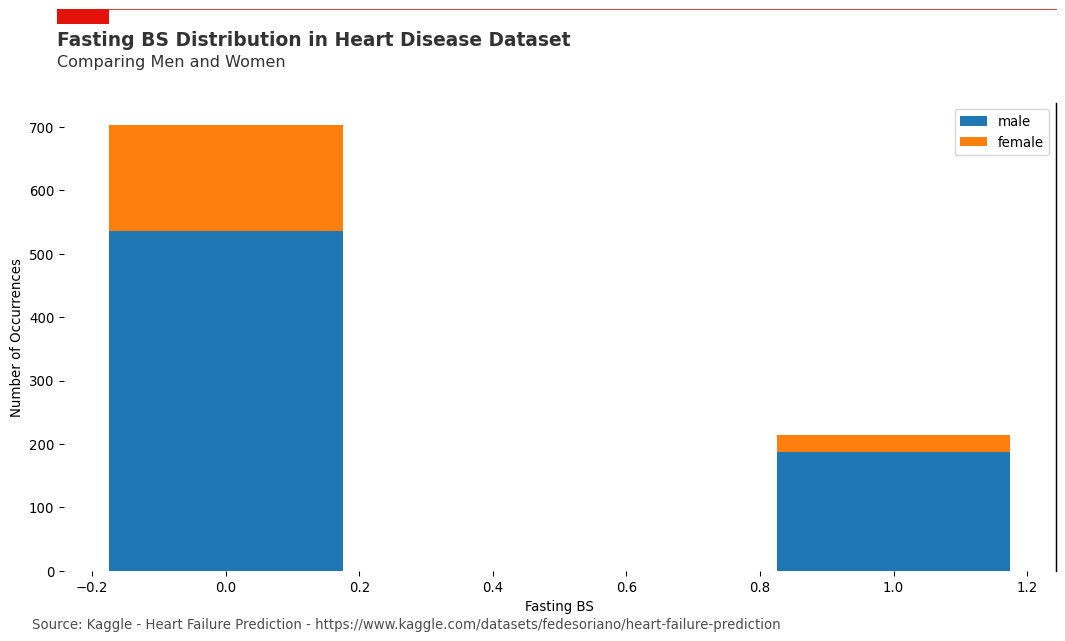

In [14]:
'''
Fasting BS
'''
## Fastings BS 
male_fasting, female_fasting = creating_female_and_male_dictionaries('FastingBS')
set_up_bar_chart("Fasting BS Distribution in Heart Disease Dataset", "Comparing Men and Women")

p1 = plt.bar(list(male_fasting.keys()), list(male_fasting.values()), 0.35)
p2 = plt.bar(list(female_fasting.keys()), list(female_fasting.values()), 0.35,
             bottom = list(male_fasting.values()))
 
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.xlabel('Fasting BS')
plt.ylabel('Number of Occurrences')
plt.show()


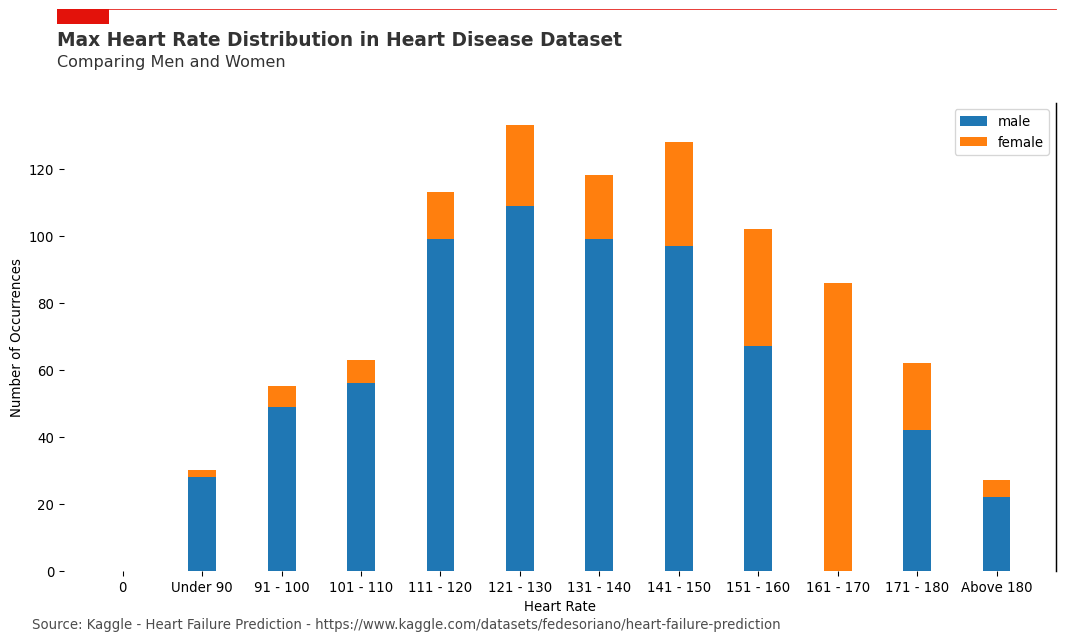

In [15]:
'''
Max HR 
'''
female_heart_rate = {
    '0': 0, 
    'Under 90': 0,
    '91 - 100': 0,
    '101 - 110': 0, 
    '111 - 120': 0, 
    '121 - 130': 0, 
    '131 - 140': 0, 
    '141 - 150': 0,
    '151 - 160': 0, 
    '161 - 170': 0,
    '171 - 180': 0,
    'Above 180': 0
}
male_heart_rate = {
    '0': 0, 
    'Under 90': 0,
    '91 - 100': 0,
    '101 - 110': 0, 
    '111 - 120': 0, 
    '121 - 130': 0, 
    '131 - 140': 0, 
    '141 - 150': 0,
    '151 - 160': 0, 
    '161 - 170': 0,
    '171 - 180': 0,
    'Above 180': 0
}

max_hr_column = list(df['MaxHR'])
del max_hr_column[0]

for i in range(0, len(gender_column)):
    hr = int(max_hr_column[i])
    if gender_column[i] == 'F':
        if hr == 0: 
            female_heart_rate['0'] += 1 
        elif 0 < hr <= 90: 
            female_heart_rate['Under 90'] += 1 
        elif 90 < hr <= 100: 
            female_heart_rate['91 - 100'] += 1 
        elif 100 < hr <= 110: 
            female_heart_rate['101 - 110'] += 1
        elif 110 < hr <= 120: 
            female_heart_rate['111 - 120'] += 1
        elif 120 < hr <= 130: 
            female_heart_rate['121 - 130'] += 1
        elif 130 < hr <= 140: 
            female_heart_rate['131 - 140'] += 1
        elif 140 < hr <= 150: 
            female_heart_rate['141 - 150'] += 1
        elif 150 < hr <= 160: 
            female_heart_rate['151 - 160'] += 1
        elif 160 < hr <= 170: 
            female_heart_rate['161 - 170'] += 1
        elif 170 < hr <= 180: 
            female_heart_rate['171 - 180'] += 1
        elif 180 < hr: 
            female_heart_rate['Above 180'] += 1 
    if gender_column[i] == 'M':
        if hr == 0: 
            male_heart_rate['0'] += 1 
        elif 0 < hr <= 90: 
            male_heart_rate['Under 90'] += 1 
        elif 90 < hr <= 100: 
            male_heart_rate['91 - 100'] += 1 
        elif 100 < hr <= 110: 
            male_heart_rate['101 - 110'] += 1
        elif 110 < hr <= 120: 
            male_heart_rate['111 - 120'] += 1
        elif 120 < hr <= 130: 
            male_heart_rate['121 - 130'] += 1
        elif 130 < hr <= 140: 
            male_heart_rate['131 - 140'] += 1
        elif 140 < hr <= 150: 
            male_heart_rate['141 - 150'] += 1
        elif 150 < hr <= 160: 
            male_heart_rate['151 - 160'] += 1
        elif 160 < hr <= 170: 
            female_heart_rate['161 - 170'] += 1
        elif 170 < hr <= 180: 
            male_heart_rate['171 - 180'] += 1
        elif 180 < hr: 
            male_heart_rate['Above 180'] += 1 
set_up_bar_chart("Max Heart Rate Distribution in Heart Disease Dataset", "Comparing Men and Women")

p1 = plt.bar(list(male_heart_rate.keys()), list(male_heart_rate.values()), 0.35)
p2 = plt.bar(list(female_heart_rate.keys()), list(female_heart_rate.values()), 0.35,
             bottom = list(male_heart_rate.values()))
 
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.xlabel('Heart Rate')
plt.ylabel('Number of Occurrences')
plt.show()

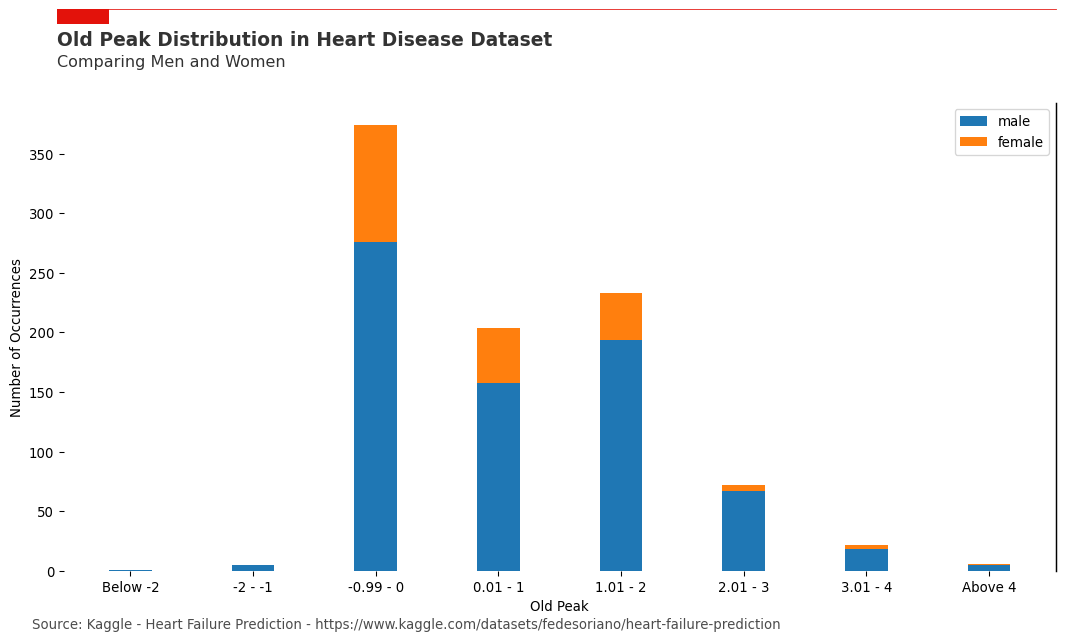

In [16]:
'''
Old Peak 
'''
male_old_peak = {
    'Below -2': 0,
    '-2 - -1': 0,
    '-0.99 - 0': 0,
    '0.01 - 1': 0,
    '1.01 - 2': 0,
    '2.01 - 3': 0, 
    '3.01 - 4': 0, 
    'Above 4': 0
}
female_old_peak = {
    'Below -2': 0,
    '-2 - -1': 0,
    '-0.99 - 0': 0,
    '0.01 - 1': 0,
    '1.01 - 2': 0,
    '2.01 - 3': 0, 
    '3.01 - 4': 0, 
    'Above 4': 0    
} 

old_peak_column = list(df['Oldpeak'])
del old_peak_column[0]

for i in range(0, len(gender_column)):
    op = float(old_peak_column[i])
    if gender_column[i] == 'F':
        if op < -2: 
            female_old_peak['Below -2'] += 1 
        elif -2 <= op <= -1: 
            female_old_peak['-2 - -1'] += 1 
        elif -1 < op <= 0: 
            female_old_peak['-0.99 - 0'] += 1 
        elif 0 < op <= 1: 
            female_old_peak['0.01 - 1'] += 1
        elif 1 < op <= 2: 
            female_old_peak['1.01 - 2'] += 1
        elif 2 < op <= 3: 
            female_old_peak['2.01 - 3'] += 1
        elif 3 < op <= 4: 
            female_old_peak['3.01 - 4'] += 1
        elif 4 < op: 
            female_old_peak['Above 4'] += 1
    if gender_column[i] == 'M':
        if op < -2: 
            male_old_peak['Below -2'] += 1 
        elif -2 <= op <= -1: 
            male_old_peak['-2 - -1'] += 1 
        elif -1 < op <= 0: 
            male_old_peak['-0.99 - 0'] += 1 
        elif 0 < op <= 1: 
            male_old_peak['0.01 - 1'] += 1
        elif 1 < op <= 2: 
            male_old_peak['1.01 - 2'] += 1
        elif 2 < op <= 3: 
            male_old_peak['2.01 - 3'] += 1
        elif 3 < op <= 4: 
            male_old_peak['3.01 - 4'] += 1
        elif 4 < op: 
            male_old_peak['Above 4'] += 1

set_up_bar_chart("Old Peak Distribution in Heart Disease Dataset", "Comparing Men and Women")

p1 = plt.bar(list(male_old_peak.keys()), list(male_old_peak.values()), 0.35)
p2 = plt.bar(list(female_old_peak.keys()), list(female_old_peak.values()), 0.35,
             bottom = list(male_old_peak.values()))
 
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.xlabel('Old Peak')
plt.ylabel('Number of Occurrences')
plt.show()


{0: 266, 1: 458}
{0: 143, 1: 50}


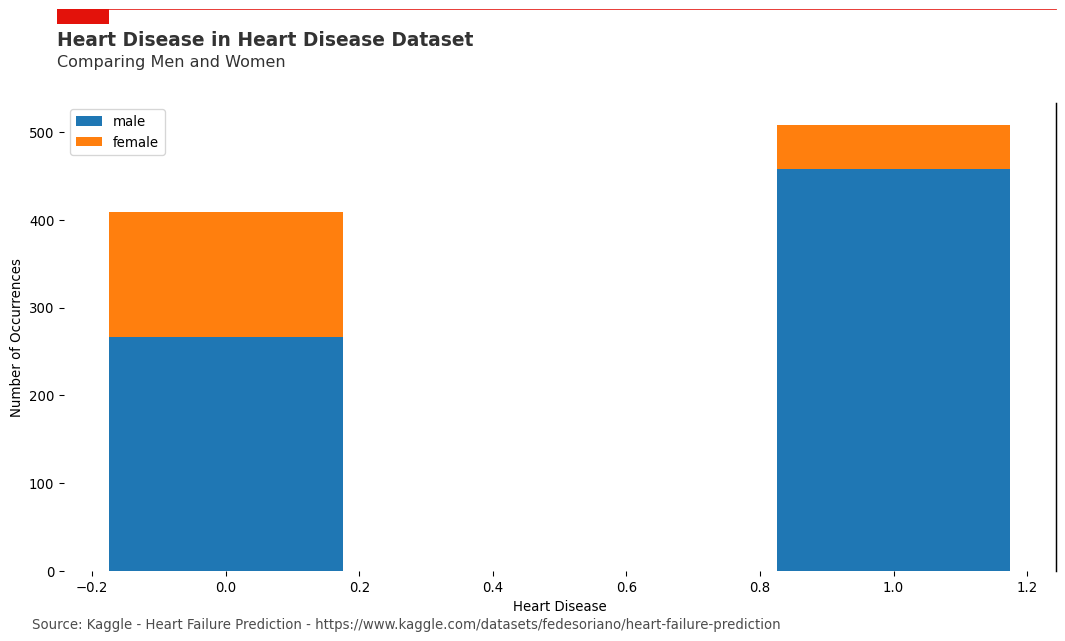

In [17]:
male_heart_disease, female_heart_disease = creating_female_and_male_dictionaries_heart_disease('HeartDisease')

set_up_bar_chart("Heart Disease in Heart Disease Dataset", "Comparing Men and Women")

print(male_heart_disease)
print(female_heart_disease) 

p1 = plt.bar(list(male_heart_disease.keys()), list(male_heart_disease.values()), 0.35)
p2 = plt.bar(list(female_heart_disease.keys()), list(female_heart_disease.values()), 0.35,
             bottom = list(male_heart_disease.values()))
 
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.xlabel('Heart Disease')
plt.ylabel('Number of Occurrences')
plt.show()